In [23]:
!pip install seaborn

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df = sns.load_dataset('titanic')

In [26]:
print("Shape:", df.shape)

Shape: (891, 15)


In [27]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [29]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [30]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


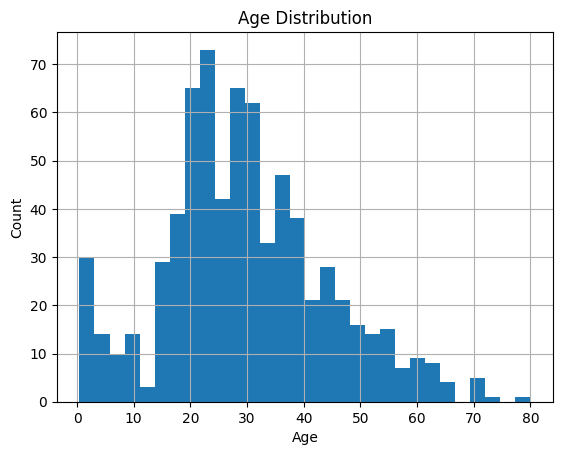

In [31]:
df['age'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [34]:
df.loc[:, 'age'].mean()

np.float64(29.69911764705882)

In [35]:
# average fare
df.loc[:,'fare'].mean()

np.float64(32.204207968574636)

In [36]:
df['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

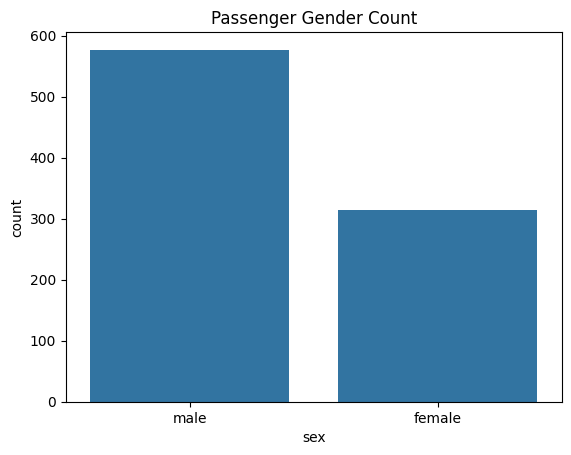

In [37]:
sns.countplot(data=df,x = 'sex')
plt.title('Passenger Gender Count')
plt.show()

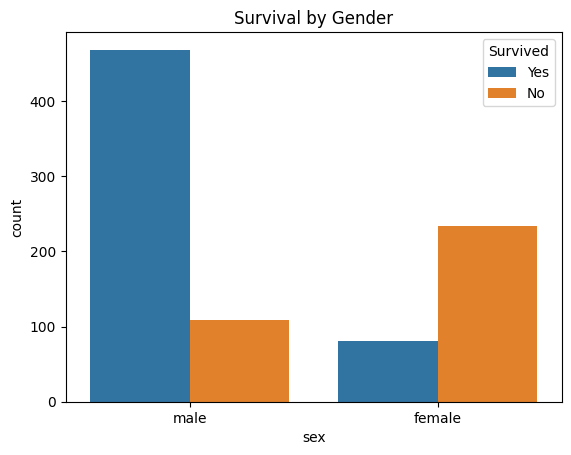

In [38]:
sns.countplot(data=df,x='sex',hue = 'survived')
plt.title('Survival by Gender')
plt.legend(title='Survived',labels=['Yes','No'])
plt.show()

In [39]:
df.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [40]:
df['sex'].value_counts()


sex
male      577
female    314
Name: count, dtype: int64

Shape: (891, 15)
Missing Values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
Survival Rate by Gender:
 sex
female    0.742038
male      0.188908
Name: survived, dtype: float64
Survival by Pclass:
 pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


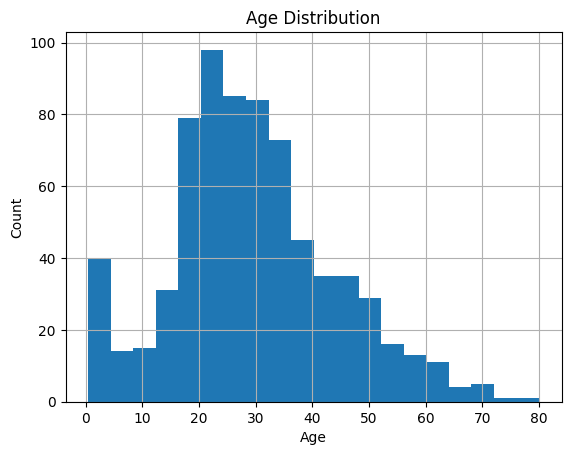

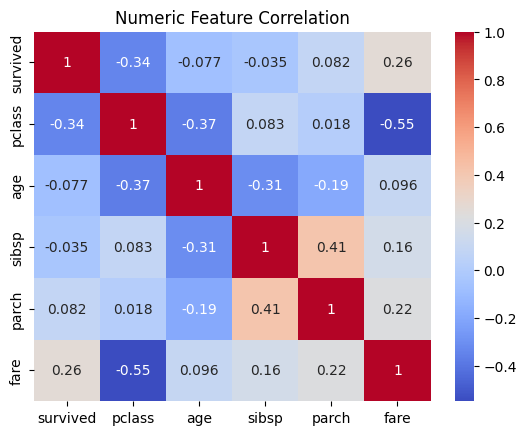

In [41]:
# Summary of Titanic EDA

# 1. Total rows and columns
print("Shape:", df.shape)

# 2. Missing values
print("Missing Values:\n", df.isnull().sum())

# 3. Survival rate by gender
print("Survival Rate by Gender:\n", df.groupby('sex')['survived'].mean())

# 4. Class-wise survival
print("Survival by Pclass:\n", df.groupby('pclass')['survived'].mean())

# 5. Age distribution
df['age'].hist(bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# 6. Correlation heatmap
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Numeric Feature Correlation")
plt.show()
